In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df.shape

(5172, 3002)

In [4]:
df.isnull().any()

Email No.     False
the           False
to            False
ect           False
and           False
              ...  
military      False
allowing      False
ff            False
dry           False
Prediction    False
Length: 3002, dtype: bool

In [5]:
df.drop(columns='Email No.' , inplace=True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [6]:
df.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [8]:
df.Prediction.unique()

array([0, 1], dtype=int64)

In [9]:
df['Prediction'] = df['Prediction'].replace({0: 'Not spam',1: 'Spam'})
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,Not spam
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,Not spam
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,Not spam
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,Not spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,Not spam
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,Not spam
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,Spam
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,Spam


In [10]:
X = df.drop(columns='Prediction',axis=1)
Y = df['Prediction']

In [11]:
X.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)

In [12]:
Y.head

<bound method NDFrame.head of 0       Not spam
1       Not spam
2       Not spam
3       Not spam
4       Not spam
          ...   
5167    Not spam
5168    Not spam
5169        Spam
5170        Spam
5171    Not spam
Name: Prediction, Length: 5172, dtype: object>

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=10)

In [16]:
KN = KNeighborsClassifier
knn = KN(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [17]:
print("Prediction: \n")
print(y_pred)

Prediction: 

['Not spam' 'Not spam' 'Spam' ... 'Spam' 'Spam' 'Not spam']


In [18]:
#accuracy

M = metrics.accuracy_score(y_test,y_pred)
print("KNN accuracy: ", M)

KNN accuracy:  0.8647342995169082


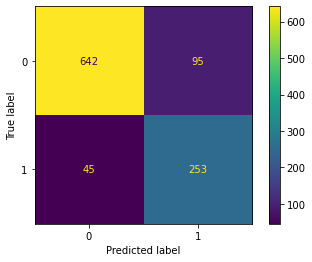

In [21]:
C= metrics.confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=C)
disp.plot()
plt.show()